# Energy Efficiency

We perform energy analysis using 12 different building shapes simulated in Ecotect. The buildings differ with respect to the glazing area, the glazing area distribution, and the orientation, amongst other parameters. We simulate various settings as functions of the afore-mentioned characteristics to obtain 768 building shapes. The dataset comprises 768 samples and 8 features, aiming to predict two real valued responses. It can also be used as a multi-class classification problem if the response is rounded to the nearest integer.

The dataset contains eight attributes (or features, denoted by X1...X8) and two responses (or outcomes, denoted by y1 and y2). The aim is to use the eight features to predict each of the two responses.

Specifically:

- X1 Relative Compactness
- X2 Surface Area
- X3 Wall Area
- X4 Roof Area
- X5 Overall Height
- X6 Orientation
- X7 Glazing Area
- X8 Glazing Area Distribution
- y1 Heating Load
- y2 Cooling Load

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.metrics import mean_squared_error

In [2]:
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/00242/ENB2012_data.xlsx'
energy = pd.read_excel(url)
energy.head(12)

,X1,X2,X3,X4,X5,X6,X7,X8,Y1,Y2
0,0.98,514.5,294.0,110.25,7.0,2,0.0,0,15.55,21.33
1,0.98,514.5,294.0,110.25,7.0,3,0.0,0,15.55,21.33
2,0.98,514.5,294.0,110.25,7.0,4,0.0,0,15.55,21.33
3,0.98,514.5,294.0,110.25,7.0,5,0.0,0,15.55,21.33
4,0.90,563.5,318.5,122.50,7.0,2,0.0,0,20.84,28.28
5,0.90,563.5,318.5,122.50,7.0,3,0.0,0,21.46,25.38
6,0.90,563.5,318.5,122.50,7.0,4,0.0,0,20.71,25.16
7,0.90,563.5,318.5,122.50,7.0,5,0.0,0,19.68,29.60
8,0.86,588.0,294.0,147.00,7.0,2,0.0,0,19.50,27.30
9,0.86,588.0,294.0,147.00,7.0,3,0.0,0,19.95,21.97


In [3]:
energy.shape

(768, 10)

In [4]:
cols = ['X1 Relative Compactness', 'X2 Surface Area', 'X3 Wall Area', 'X4 Roof Area', 'X5 Overall Height', 
        'X6 Orientation', 'X7 Glazing Area', 'X8 Glazing Area Distribution', 'y1 Heating Load', 'y2 Cooling Load']
energy.columns = cols

In [5]:
# quick check - any missing values?
energy.isna().sum()

X1 Relative Compactness         0
X2 Surface Area                 0
X3 Wall Area                    0
X4 Roof Area                    0
X5 Overall Height               0
X6 Orientation                  0
X7 Glazing Area                 0
X8 Glazing Area Distribution    0
y1 Heating Load                 0
y2 Cooling Load                 0
dtype: int64

In [6]:
energy['X6 Orientation'].unique()

array([2, 3, 4, 5], dtype=int64)

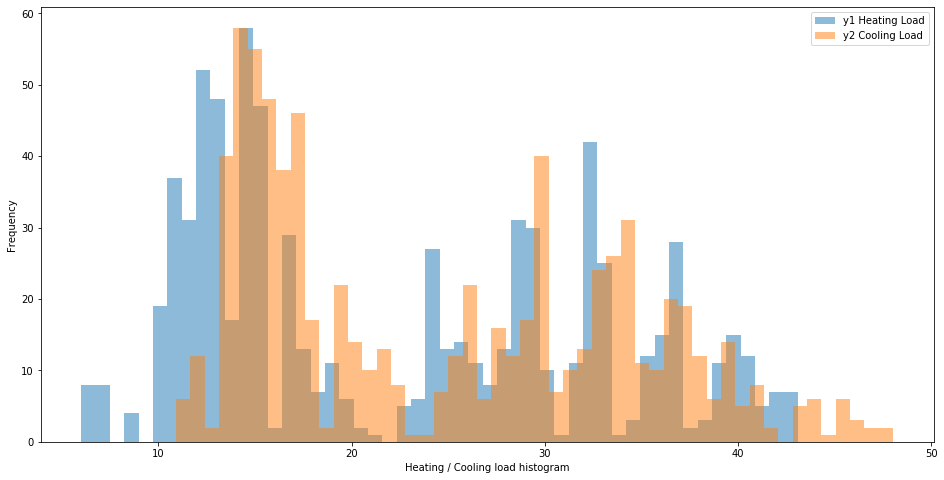

In [7]:
# show distribution of output values
plt.figure(figsize=(16,8))
energy['y1 Heating Load'].plot.hist(bins=50, alpha=0.5)
energy['y2 Cooling Load'].plot.hist(bins=50, alpha=0.5)
plt.xlabel('Heating / Cooling load histogram')
plt.legend()
plt.show()

In [8]:
from sklearn.svm import SVR
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [9]:
X = energy[['X1 Relative Compactness', 'X2 Surface Area', 'X3 Wall Area', 'X4 Roof Area', 'X5 Overall Height', 
        'X6 Orientation', 'X7 Glazing Area', 'X8 Glazing Area Distribution']]
y = energy[['y1 Heating Load', 'y2 Cooling Load']]

In [10]:
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1)
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(691, 8) (691, 2) (77, 8) (77, 2)


In [12]:
#y_train.values[:,0]

array([32.41 , 27.03 , 32.46 , 12.85 , 16.47 , 28.01 ,  6.37 , 41.4  ,
       11.22 , 35.48 , 12.35 , 39.04 , 12.65 , 24.11 , 40.57 ,  8.6  ,
       15.12 , 33.21 , 24.29 , 29.5  , 40.43 , 32.24 , 12.29 , 32.   ,
       11.11 , 36.81 , 10.55 , 17.88 , 29.07 , 14.33 , 28.55 ,  6.05 ,
       12.74 , 17.11 , 14.52 , 32.06 , 14.61 , 28.64 , 32.29 , 42.08 ,
       14.92 , 12.16 , 10.35 , 12.32 , 40.12 , 28.62 , 10.7  ,  6.81 ,
       32.33 , 16.55 , 32.31 , 31.28 , 28.67 , 11.44 , 27.9  , 28.83 ,
       23.75 , 32.67 ,  8.49 , 11.67 , 14.54 , 13.86 , 14.53 , 24.6  ,
       14.71 , 39.32 , 23.86 , 11.69 , 10.67 , 16.35 , 14.47 , 32.46 ,
       32.75 , 28.18 , 41.96 , 16.77 , 28.95 , 10.54 , 17.5  , 37.12 ,
       42.74 , 33.28 , 16.76 , 25.66 , 19.68 , 40.71 , 10.42 , 14.7  ,
       15.09 , 32.84 , 29.02 , 23.59 , 14.51 , 29.83 , 29.39 ,  7.18 ,
       40.79 , 35.96 , 10.37 , 16.84 , 35.56 , 28.64 , 32.84 , 24.35 ,
       11.1  , 39.97 , 37.26 , 14.03 , 25.7  , 32.74 , 32.21 , 10.38 ,
      

Heating load

In [13]:
svr = SVR()
svr_rbf_h = SVR(kernel='rbf', C=1e3, gamma=0.1)
svr_lin_h = SVR(kernel='linear', C=1e3)
svr_poly_h = SVR(kernel='poly', C=1e3, degree=2)
y_rbf_h = svr_rbf_h.fit(X_train, y_train.values[:,0]).predict(X_test)
y_lin_h = svr_lin_h.fit(X_train, y_train.values[:,0]).predict(X_test)
y_poly_h = svr_poly_h.fit(X_train, y_train.values[:,0]).predict(X_test)

In [14]:
rbf_mse_h = mean_squared_error(y_test.values[:,0], y_rbf_h)
rbf_mse_h

0.3187113611311286

In [15]:
lin_mse_h = mean_squared_error(y_test.values[:,0], y_lin_h)
lin_mse_h

8.206230676850689

In [16]:
ply_mse_h = mean_squared_error(y_test.values[:,0], y_poly_h)
ply_mse_h

52.40988645016926

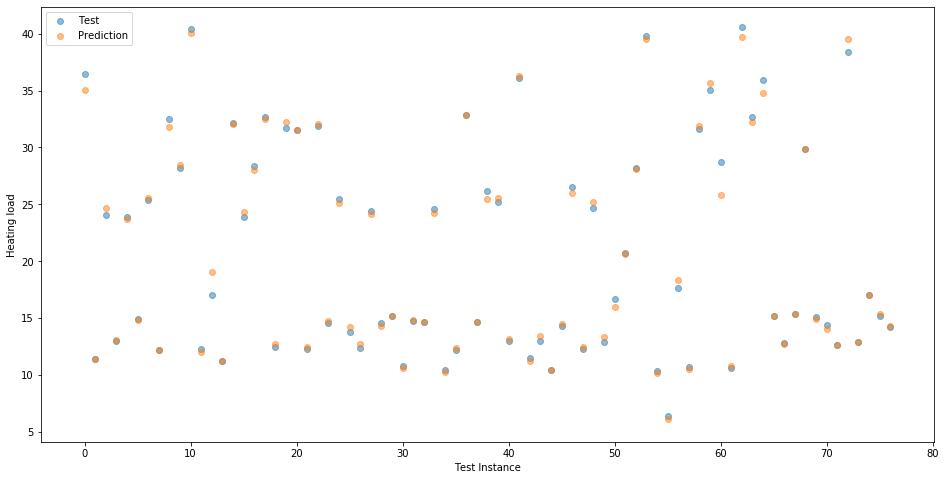

In [17]:
x = range(len(y_test.values[:,0]))

plt.figure(figsize=(16,8))
plt.scatter(x, y_test.values[:,0],alpha=0.5,label='Test')
plt.scatter(x, y_rbf_h,alpha=0.5,label='Prediction')
plt.xlabel('Test Instance')
plt.ylabel('Heating load')
plt.legend()
plt.show()

Cooling load

In [18]:
svr_rbf_c = SVR(kernel='rbf', C=1e3, gamma=0.15, epsilon=0.01)
svr_lin_c = SVR(kernel='linear', C=1e3)
svr_poly_c = SVR(kernel='poly', C=1e3, degree=2)
svr_sig_c = SVR(kernel='sigmoid', C=0.2, gamma='auto', epsilon=0.01)
y_rbf_c = svr_rbf_c.fit(X_train, y_train.values[:,1]).predict(X_test)
y_lin_c = svr_lin_c.fit(X_train, y_train.values[:,1]).predict(X_test)
y_poly_c = svr_poly_c.fit(X_train, y_train.values[:,1]).predict(X_test)
y_sig_c = svr_sig_c.fit(X_train, y_train.values[:,1]).predict(X_test)

In [19]:
rbf_mse_c = mean_squared_error(y_test.values[:,1], y_rbf_c)
rbf_mse_c

2.3220119198688334

In [20]:
lin_mse_c = mean_squared_error(y_test.values[:,1], y_lin_c)
lin_mse_c

9.933315576843222

In [21]:
ply_mse_c = mean_squared_error(y_test.values[:,1], y_poly_c)
ply_mse_c

39.918759634619605

In [22]:
sig_mse_c = mean_squared_error(y_test.values[:,1], y_sig_c)
sig_mse_c

12.72388982701069

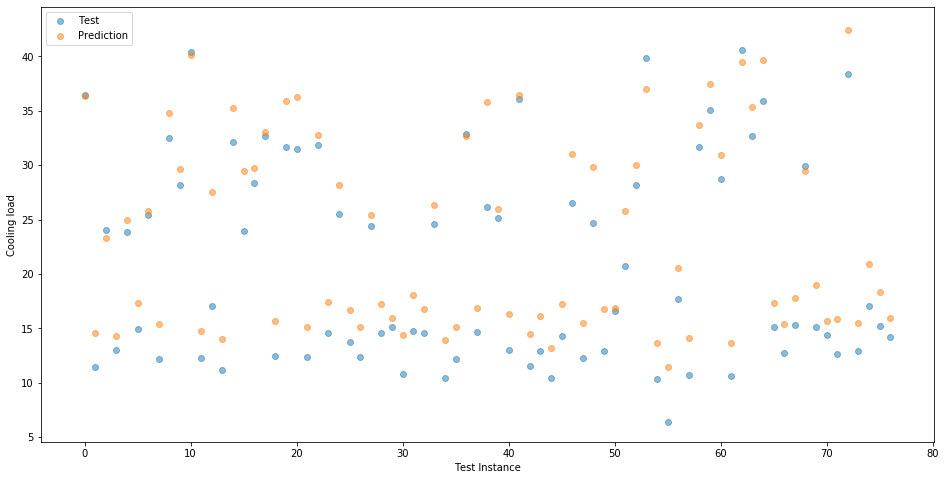

In [23]:
plt.figure(figsize=(16,8))
plt.scatter(x, y_test.values[:,0],alpha=0.5,label='Test')
plt.scatter(x, y_rbf_c,alpha=0.5, label='Prediction')
plt.xlabel('Test Instance')
plt.ylabel('Cooling load')
plt.legend()
plt.show()

In [24]:
from sklearn.ensemble import RandomForestRegressor
rfr_c = RandomForestRegressor(n_estimators=200, random_state=1223)

y_rfr_c = rfr_c.fit(X_train, y_train.values[:,1]).predict(X_test)
rfr_mse_c = mean_squared_error(y_test.values[:,1], y_rfr_c)
rfr_mse_c

2.8281643251623487

Hyperparameter tuning on cooling model

In [25]:
from sklearn.model_selection import GridSearchCV

parameters = {'C':[1, 10, 100, 1000, 1000], 'gamma': [1,0.1,0.01,0.001]}
grid = GridSearchCV(svr, parameters, refit = True, verbose = 3) 
  
# fitting the model for grid search 
grid.fit(X_train, y_train.values[:,1]) 

params = grid.best_params_
print(params)

Fitting 5 folds for each of 20 candidates, totalling 100 fits
[CV] C=1, gamma=1 ....................................................
[CV] ........................ C=1, gamma=1, score=0.605, total=   0.0s
[CV] C=1, gamma=1 ....................................................
[CV] ........................ C=1, gamma=1, score=0.649, total=   0.0s
[CV] C=1, gamma=1 ....................................................
[CV] ........................ C=1, gamma=1, score=0.562, total=   0.0s
[CV] C=1, gamma=1 ....................................................
[CV] ........................ C=1, gamma=1, score=0.620, total=   0.0s
[CV] C=1, gamma=1 ....................................................
[CV] ........................ C=1, gamma=1, score=0.620, total=   0.0s
[CV] C=1, gamma=0.1 ..................................................
[CV] ...................... C=1, gamma=0.1, score=0.909, total=   0.0s
[CV] C=1, gamma=0.1 ..................................................
[CV] ..........

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s



[CV] C=1, gamma=0.01 .................................................
[CV] ..................... C=1, gamma=0.01, score=0.834, total=   0.0s
[CV] C=1, gamma=0.001 ................................................
[CV] .................... C=1, gamma=0.001, score=0.396, total=   0.0s
[CV] C=1, gamma=0.001 ................................................
[CV] .................... C=1, gamma=0.001, score=0.453, total=   0.0s
[CV] C=1, gamma=0.001 ................................................
[CV] .................... C=1, gamma=0.001, score=0.348, total=   0.0s
[CV] C=1, gamma=0.001 ................................................
[CV] .................... C=1, gamma=0.001, score=0.396, total=   0.0s
[CV] C=1, gamma=0.001 ................................................
[CV] .................... C=1, gamma=0.001, score=0.439, total=   0.0s
[CV] C=10, gamma=1 ...................................................
[CV] ....................... C=10, gamma=1, score=0.946, total=   0.0s
[CV] 

[CV] .................. C=1000, gamma=0.01, score=0.908, total=   0.1s
[CV] C=1000, gamma=0.01 ..............................................
[CV] .................. C=1000, gamma=0.01, score=0.908, total=   0.1s
[CV] C=1000, gamma=0.01 ..............................................
[CV] .................. C=1000, gamma=0.01, score=0.918, total=   0.1s
[CV] C=1000, gamma=0.001 .............................................
[CV] ................. C=1000, gamma=0.001, score=0.914, total=   0.0s
[CV] C=1000, gamma=0.001 .............................................
[CV] ................. C=1000, gamma=0.001, score=0.871, total=   0.0s
[CV] C=1000, gamma=0.001 .............................................
[CV] ................. C=1000, gamma=0.001, score=0.889, total=   0.0s
[CV] C=1000, gamma=0.001 .............................................
[CV] ................. C=1000, gamma=0.001, score=0.889, total=   0.0s
[CV] C=1000, gamma=0.001 .............................................
[CV] .

[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:   16.5s finished


{'C': 1000, 'gamma': 0.1}


In [26]:
from sklearn.model_selection import RandomizedSearchCV# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
print(random_grid)

{'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000], 'max_features': ['auto', 'sqrt'], 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4], 'bootstrap': [True, False]}


In [27]:
rf = RandomForestRegressor()
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)# Fit the random search model
rf_random.fit(X_train, y_train.values[:,1])
rf_random.best_params_

Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:   10.8s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:   50.8s
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed:  1.8min finished


{'n_estimators': 200,
 'min_samples_split': 2,
 'min_samples_leaf': 1,
 'max_features': 'sqrt',
 'max_depth': 50,
 'bootstrap': True}

In [48]:
rf = RandomForestRegressor(n_estimators=200, min_samples_split=2, min_samples_leaf=1, max_features='sqrt', max_depth=50, bootstrap=True)
y_pred = rf.fit(X_train, y_train.values[:,1]).predict(X_test)
rf_mse_c = mean_squared_error(y_test.values[:,1], y_pred)
rf_mse_c

2.2717298592207893